# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that
occurred between May 2008 and November 2010,
corresponding to a total of 79354 contacts by the Portuguese banking institution.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
## calculate the duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 12


In [ ]:
"""
# Display the columns in the dataset
"""
print("Columns in Datasets")
display(df.info())


"""# Sepearete the categorical and numerical columns"""
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Categorical Columns:")
display(categorical_cols)
print("Numerical Columns:")
display(numerical_cols)

# Percentage of rows missing for each column
print("Percentage of rows missing for each column")
print("-------------------------------------")
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
display(missing_percent)

Columns in Datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.i

None

Categorical Columns:


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

Numerical Columns:


['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

Percentage of rows missing for each column
-------------------------------------


,0


<Figure size 1200x1200 with 0 Axes>

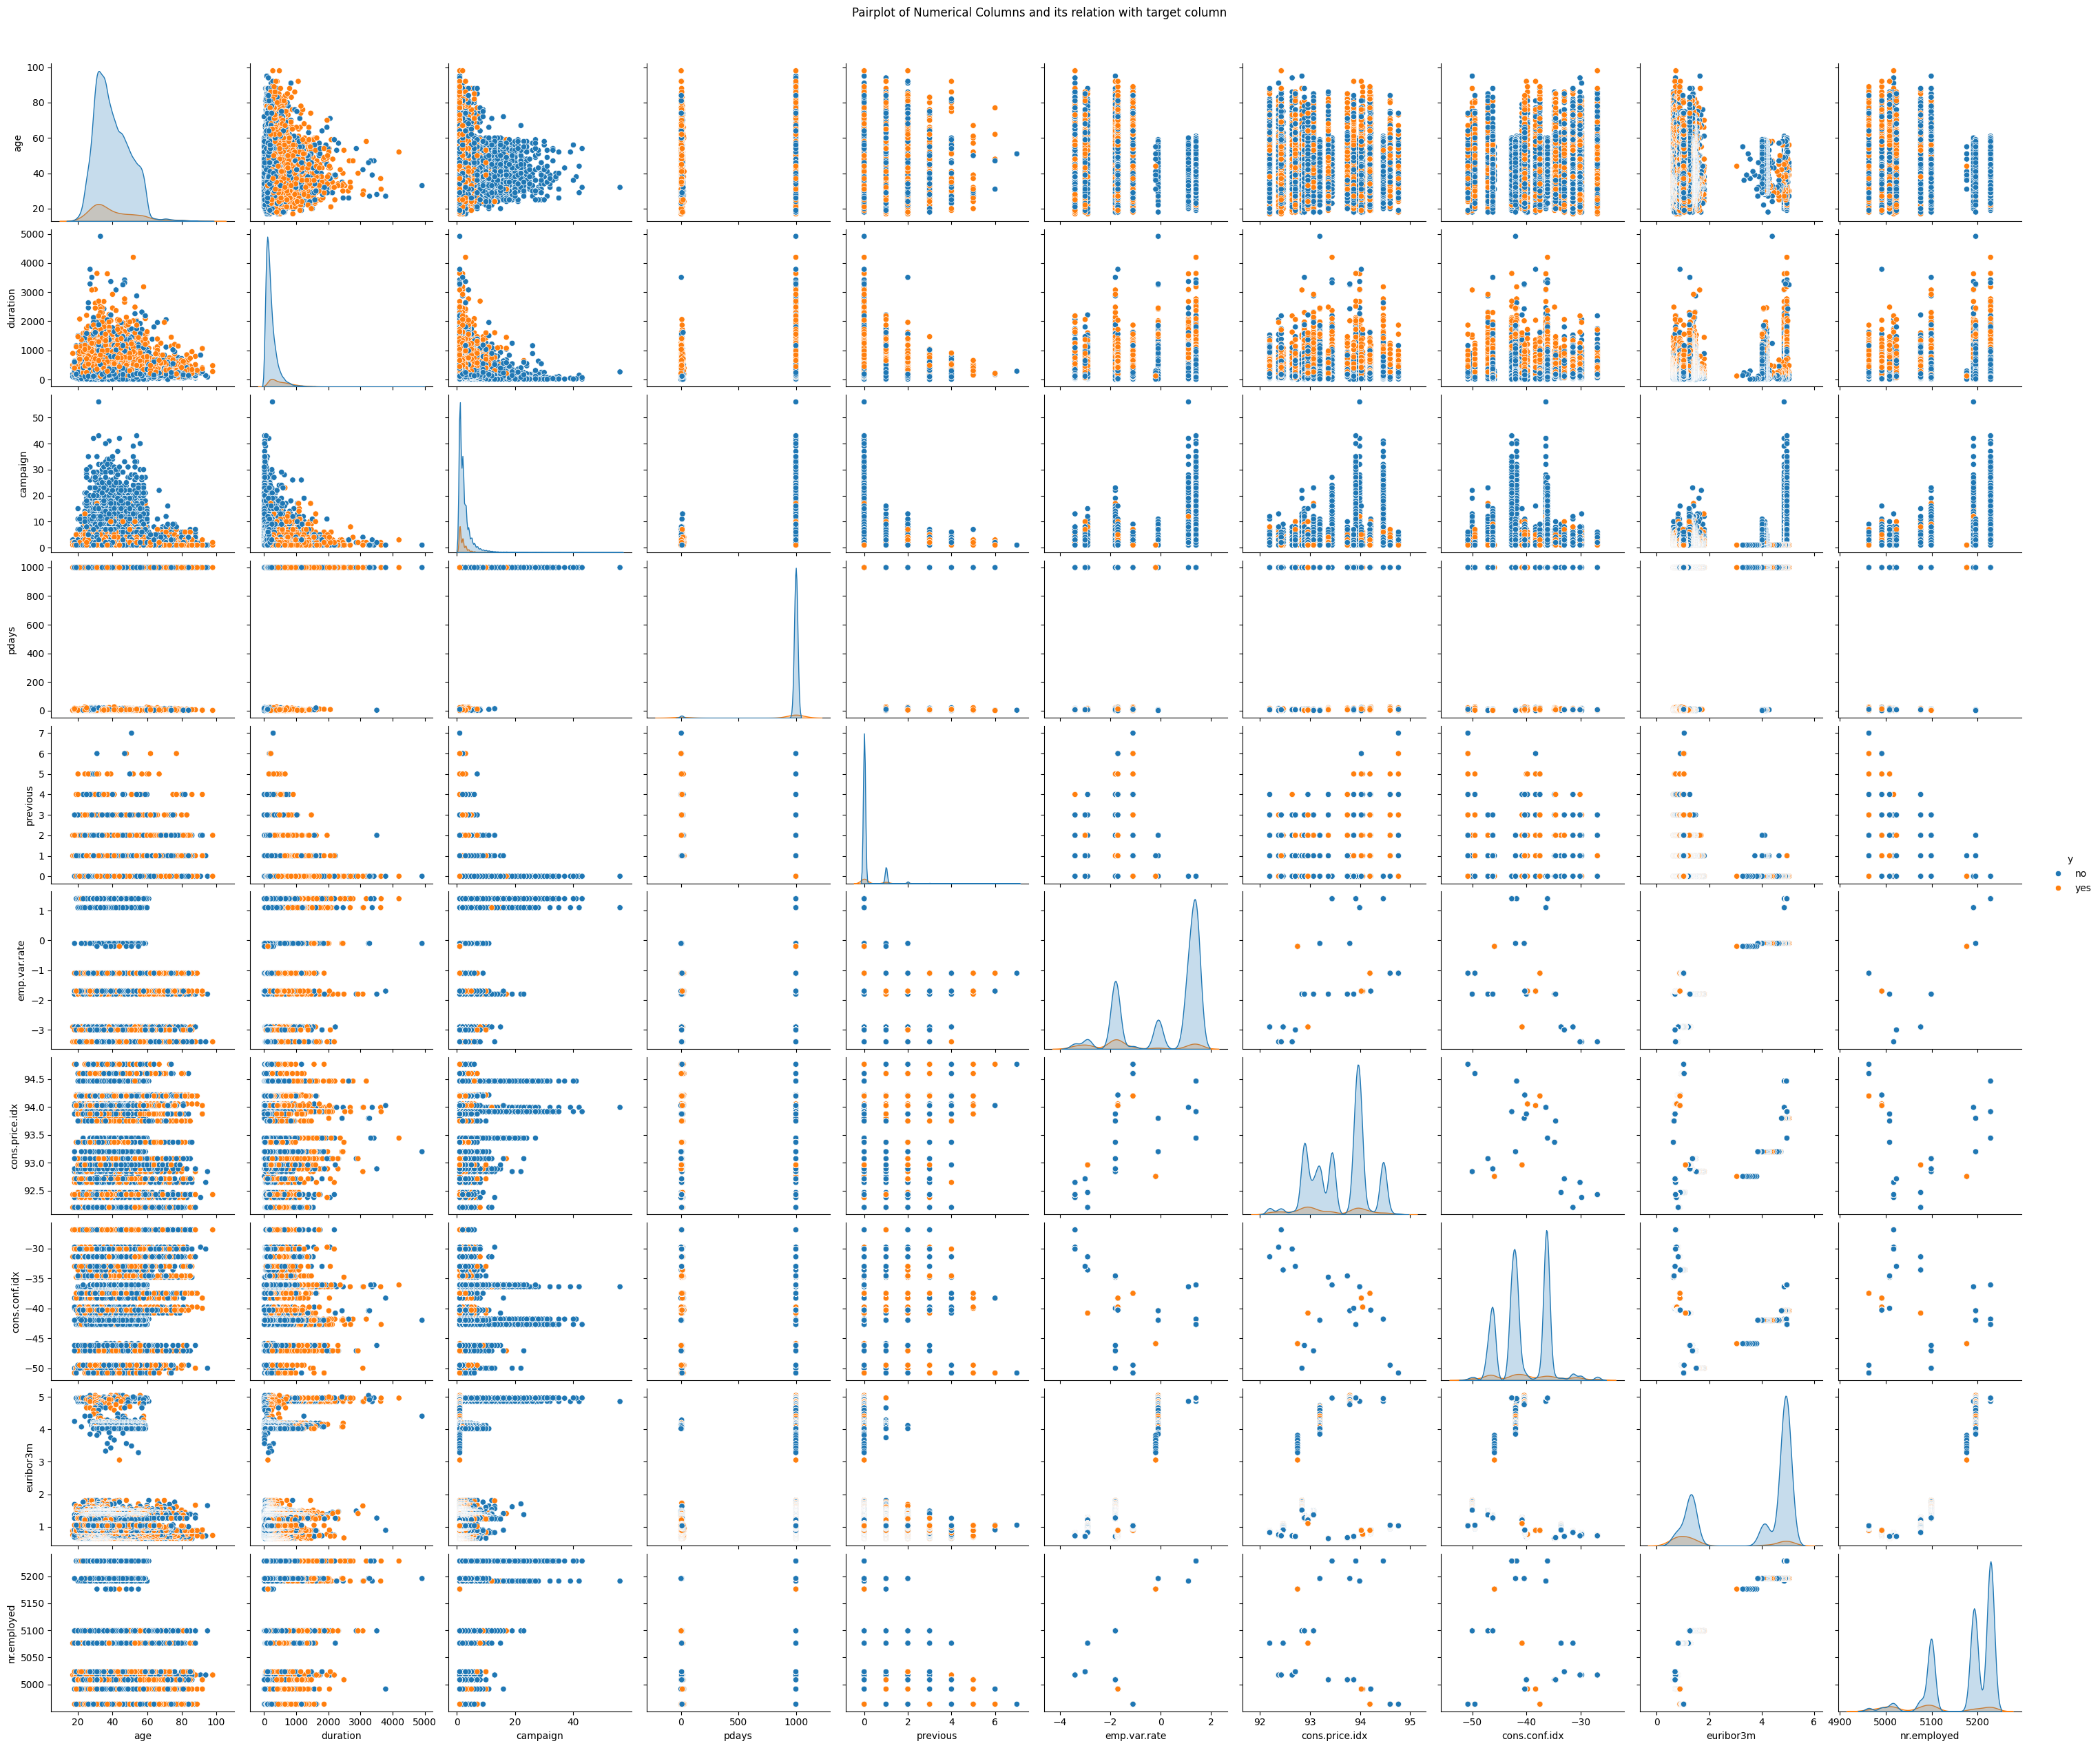

In [ ]:
# Only use numerical columns and color by 'y'
plt.figure(figsize=(12, 12))
sns.pairplot(df, vars=numerical_cols, hue='y', height=2.5, aspect=1.2)
plt.suptitle("Pairplot of Numerical Columns and its relation with target column", y=1.02)
plt.show()

<Axes: >

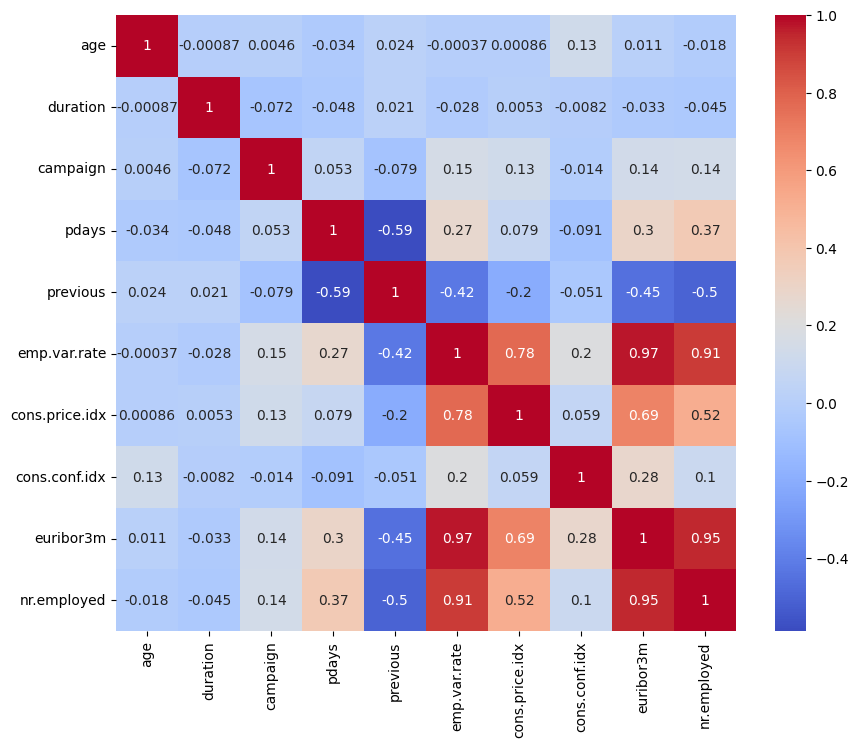

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')

<Axes: >

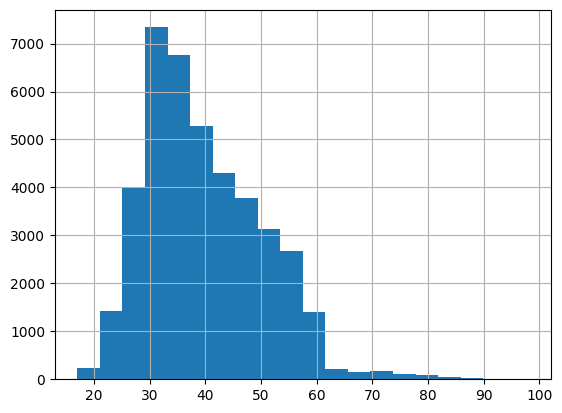

In [ ]:
df['age'].hist(bins=20)

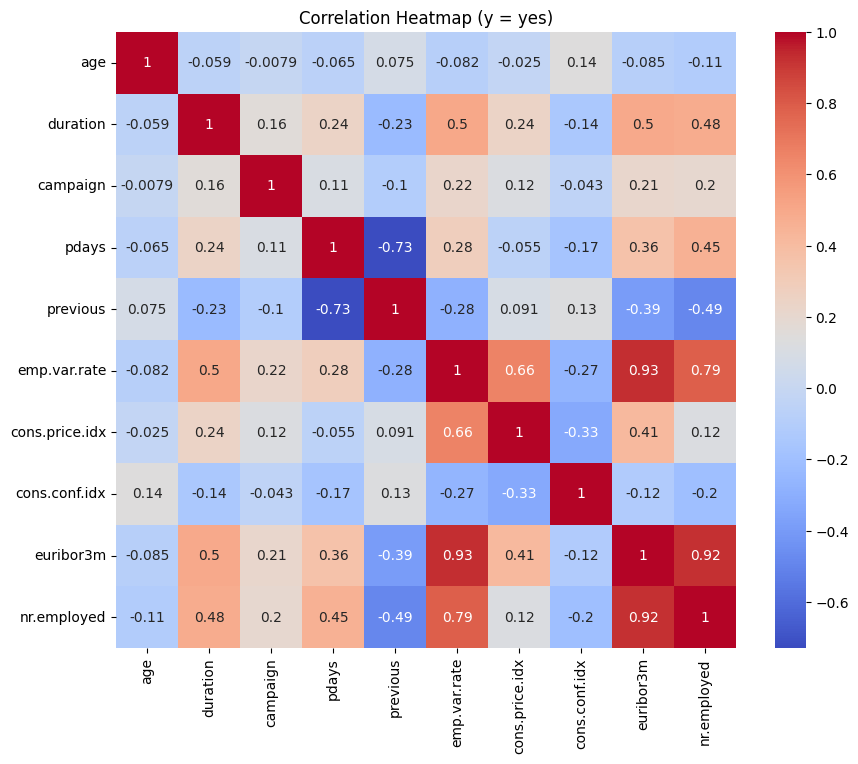

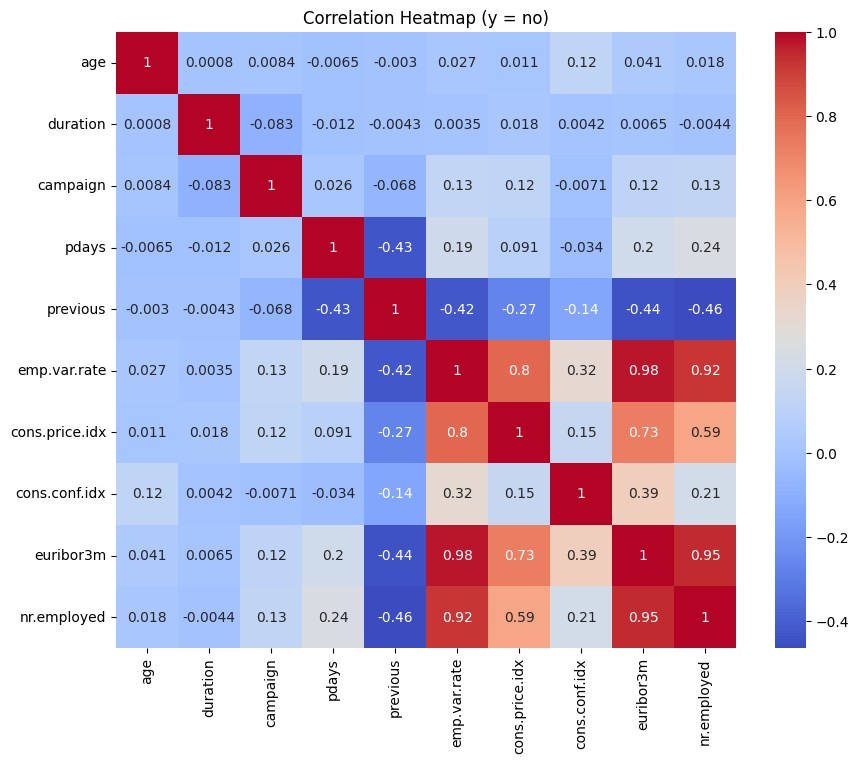

In [ ]:
# For 'yes' class
plt.figure(figsize=(10, 8))
sns.heatmap(df[df['y'] == 'yes'][numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (y = yes)")
plt.show()

# For 'no' class
plt.figure(figsize=(10, 8))
sns.heatmap(df[df['y'] == 'no'][numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (y = no)")
plt.show()

In [ ]:
# Count 'unknown' values in each column
unknown_counts = (df == 'unknown').sum()

# Calculate percentage of 'unknown' values in each column
unknown_percent = (unknown_counts / len(df)) * 100

# Combine into a DataFrame for easy viewing
unknown_summary = pd.DataFrame({
    'unknown_count': unknown_counts,
    'unknown_percent': unknown_percent
})

# Filter to show only columns with at least one 'unknown'
unknown_summary = unknown_summary[unknown_summary['unknown_count'] > 0]
print(unknown_summary)

           unknown_count  unknown_percent
job                  330         0.801204
marital               80         0.194231
education           1731         4.202680
default             8597        20.872584
housing              990         2.403613
loan                 990         2.403613


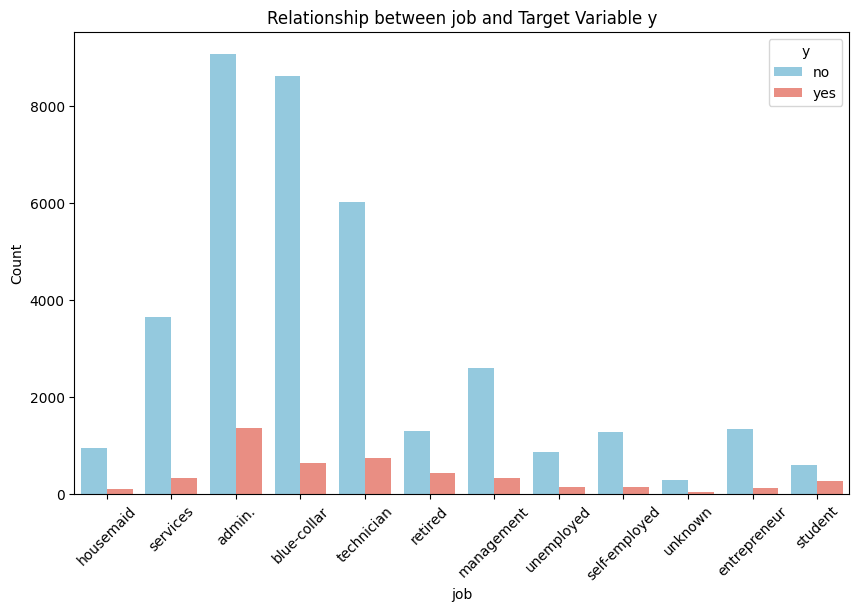

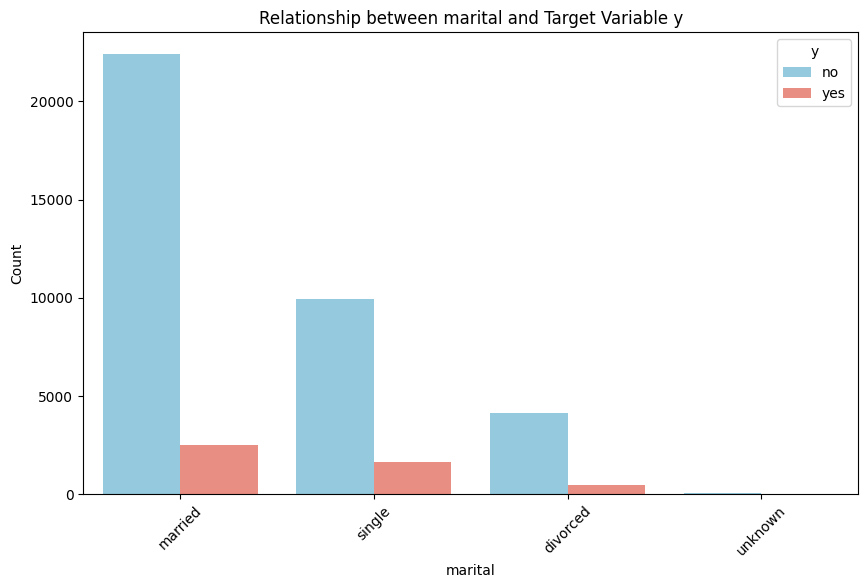

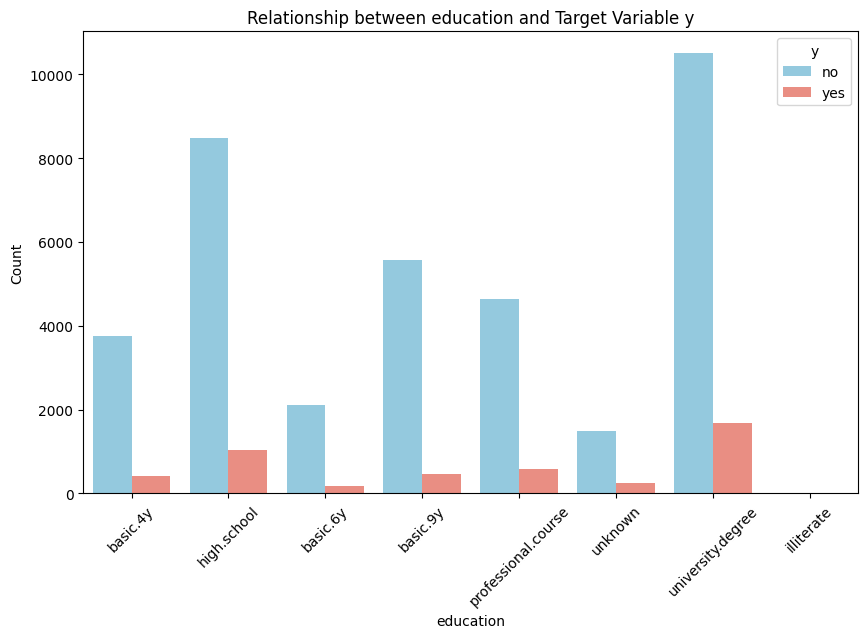

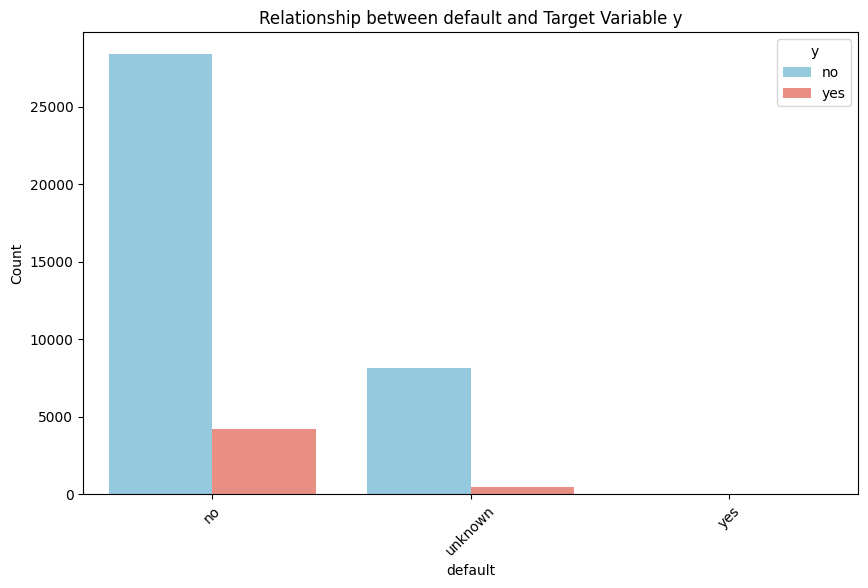

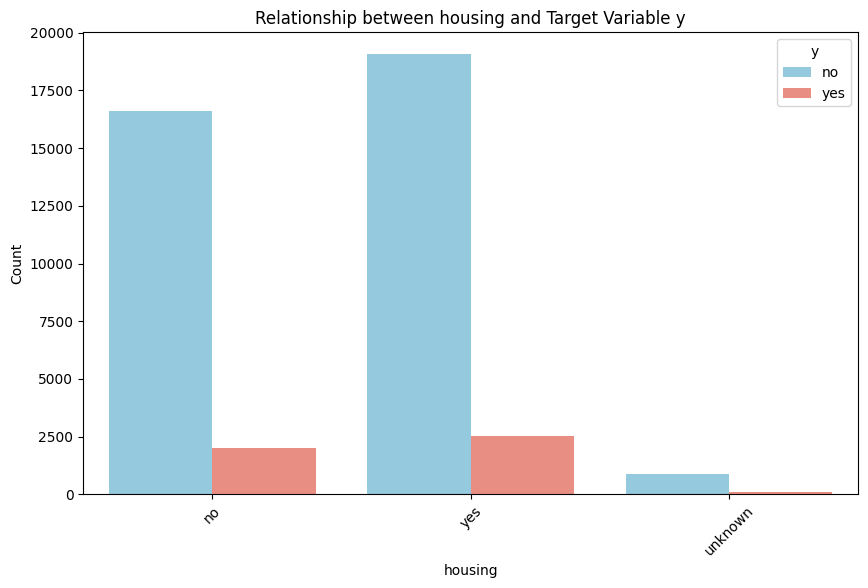

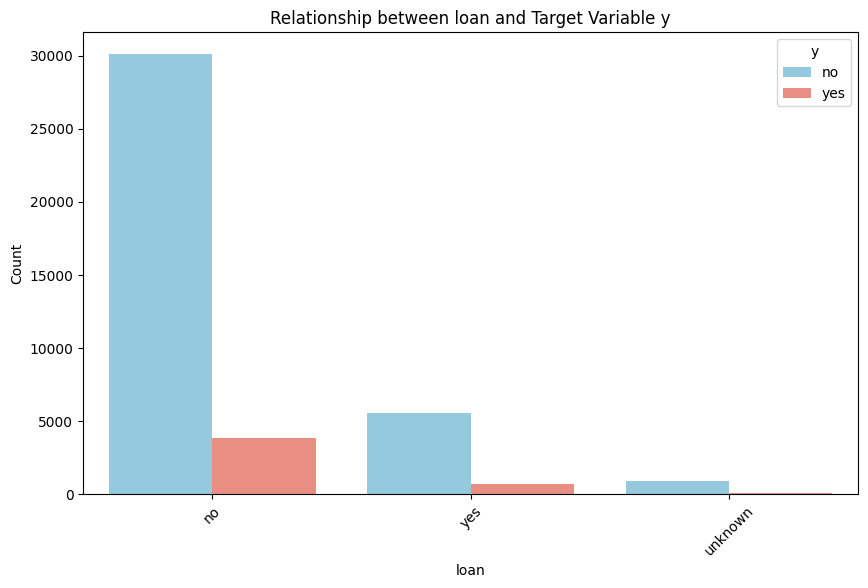

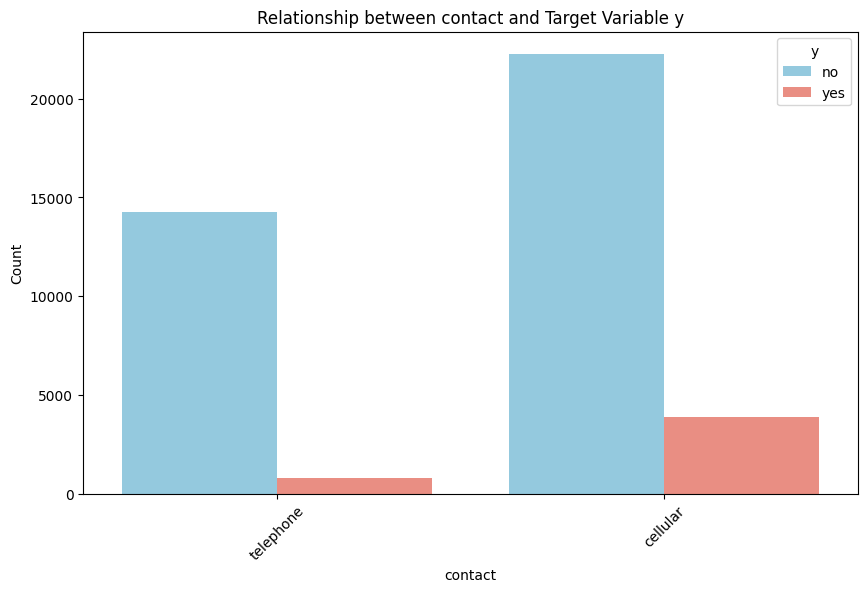

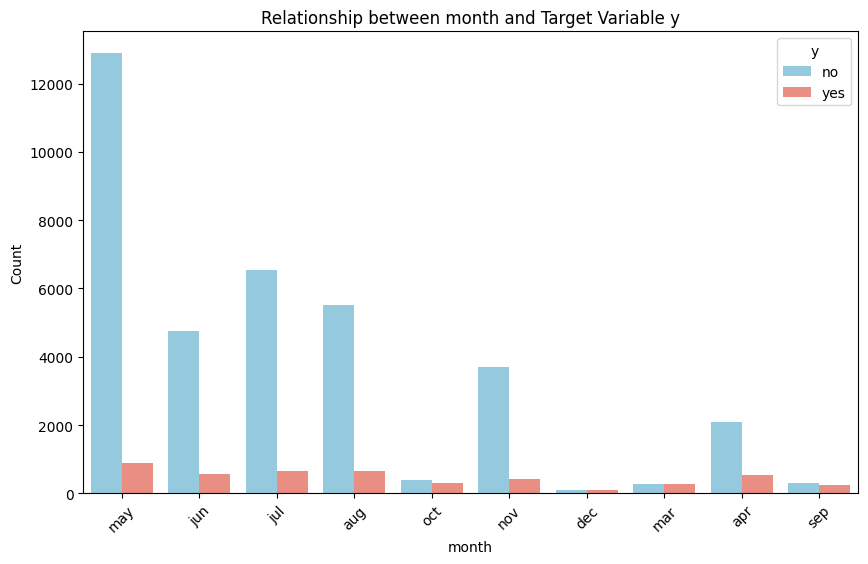

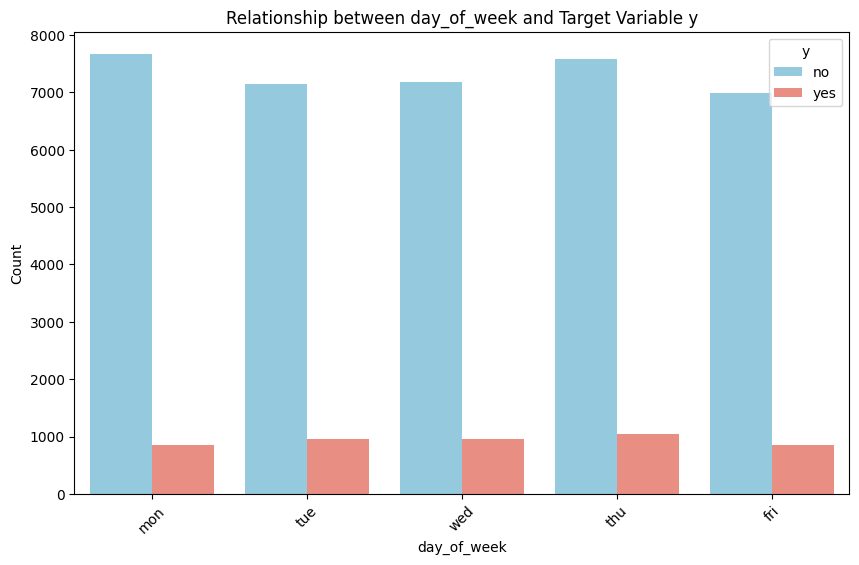

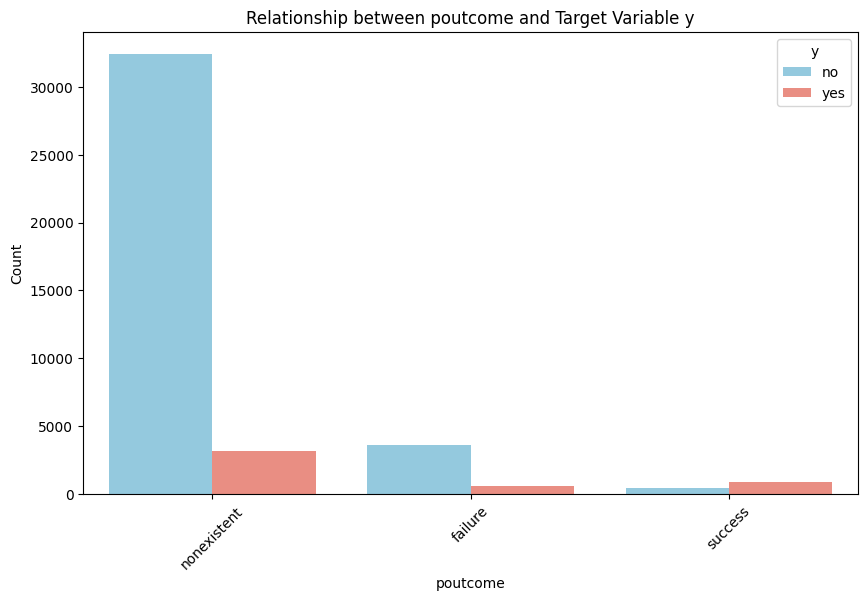

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_relationship(df, column, colors=['skyblue', 'salmon']):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='y', palette=colors)
    plt.title(f'Relationship between {column} and Target Variable y')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='y', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

for col in categorical_cols:
    if col != 'y':
        plot_categorical_relationship(df, col)

# Observations
- There are 41188 records in the dataset. The dataset contains 20 features and a target variable. It has 11 categorical features and 10 numerical features.
- The dataset does not contain any missing values but has some 'unknown' values in categorical features.
- There are 12 duplicate rows in the dataset.
- The default column has a significant number of 'unknown' values almost 20%. I will consider dropping this column as it has a high percentage of 'unknown' values.
- There are unknown values in the 'job', 'marital', 'education', 'contact', and 'poutcome' columns, which may need to be handled appropriately. I am considering filling these with the mode of the respective columns.
- The target variable 'y' is imbalanced, with a higher number of 'no' responses compared to 'yes'.
- The 'duration' feature has a strong correlation with the target variable 'y', indicating that longer call durations are associated with a higher likelihood of subscription.
- From the pairplot, there is a strong correlation between 'emp.var.rate', 'cons.price.idx', and 'euribor3m' with the target variable, suggesting that these features may be important for predicting subscription likelihood.Also, age, campaign, duration, and pdays show some correlation with the target variable.
- The 'pdays' feature has a significant number of '999' values, indicating that many clients were not previously contacted.
- The 'job', 'marital', and 'education' features show distinct distributions for the two classes of the target variable, suggesting that these features may be important for predicting subscription likelihood.
- The 'contact' feature shows a clear preference for cellular communication over telephone communication, with a higher proportion of 'yes' responses for cellular contacts.
- The 'month' and 'day_of_week' features show some seasonal patterns, with certain months and days having higher subscription rates.
- The numerical features show varying degrees of correlation with the target variable, with 'emp.var.rate', 'cons.price.idx', and 'euribor3m' showing some correlation, while others like 'nr.employed' and 'cons.conf.idx' show weaker correlations.
- The 'education' feature shows that clients with higher education levels (university degree, professional course) are more likely to subscribe, while those with lower education levels (basic education) are less likely to do so.
- The 'campaign' feature shows that clients who were contacted multiple times during the current campaign have a higher likelihood of subscribing, but there is a diminishing return effect as the number of contacts increases.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business objective
The goal is to predict whether a client will subscribe to a term deposit based on various features related to their personal information, previous interactions with the bank, and socio-economic context. This prediction can help the bank target its marketing efforts more effectively, improving customer acquisition and retention strategies.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
# Remove duplicate rows
df_clean = df.drop_duplicates()

# Check after removal
print("\nAfter removing duplicates:")
print(f"Shape: {df_clean.shape}")
print(f"Duplicate rows: {df_clean.duplicated().sum()}")


After removing duplicates:
Shape: (41176, 21)
Duplicate rows: 0


In [ ]:
# Replace 'unknown' with mode for all object columns
obj_cols = df.select_dtypes('object').columns
df[obj_cols] = df[obj_cols].apply(lambda s: s.replace('unknown', s.mode()[0]))

In [ ]:
## Drop the default column
df = df.drop(columns=['default'])

In [ ]:
print("\n=== OUTLIER HANDLING ===")

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in numeric columns
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

print("Outlier analysis:")
for col in numeric_cols:
    outliers, lower, upper = detect_outliers(df, col)
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")



=== OUTLIER HANDLING ===
Outlier analysis:
age: 469 outliers (1.1%)
duration: 2963 outliers (7.2%)
campaign: 2406 outliers (5.8%)
pdays: 1515 outliers (3.7%)
previous: 5625 outliers (13.7%)
emp.var.rate: 0 outliers (0.0%)
cons.price.idx: 0 outliers (0.0%)
cons.conf.idx: 447 outliers (1.1%)
euribor3m: 0 outliers (0.0%)
nr.employed: 0 outliers (0.0%)


In [ ]:
# Handle outliers using capping
print("\nCapping outliers...")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Capped {col} outliers to range [{lower_bound:.2f}, {upper_bound:.2f}]")



Capping outliers...
Capped age outliers to range [9.50, 69.50]
Capped duration outliers to range [-223.50, 644.50]
Capped campaign outliers to range [-2.00, 6.00]
Capped pdays outliers to range [999.00, 999.00]
Capped previous outliers to range [0.00, 0.00]
Capped emp.var.rate outliers to range [-6.60, 6.20]
Capped cons.price.idx outliers to range [91.70, 95.37]
Capped cons.conf.idx outliers to range [-52.15, -26.95]
Capped euribor3m outliers to range [-4.08, 10.39]
Capped nr.employed outliers to range [4905.60, 5421.60]


In [ ]:
# Prepare data for scaling
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = categorical_cols.drop('y') if 'y' in categorical_cols else categorical_cols


In [ ]:
X = df.drop(columns='y')  # All columns except target
y = df['y']               # Target column

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
print("Dataset shapes:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% for testing
    random_state=42,
    stratify=y                # Maintain class balance in both sets
)

print("\nTrain/Test split completed:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Check class distribution in both sets
print("\nClass distribution:")
print("Training set:")
print(f"  Class 0 (no): {np.sum(y_train == 0)} ({np.sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"  Class 1 (yes): {np.sum(y_train == 1)} ({np.sum(y_train == 1)/len(y_train)*100:.1f}%)")
print("Test set:")
print(f"  Class 0 (no): {np.sum(y_test == 0)} ({np.sum(y_test == 0)/len(y_test)*100:.1f}%)")
print(f"  Class 1 (yes): {np.sum(y_test == 1)} ({np.sum(y_test == 1)/len(y_test)*100:.1f}%)")

Dataset shapes:
Features (X): (41188, 19)
Target (y): (41188,)

Train/Test split completed:
X_train: (32950, 19)
X_test: (8238, 19)
y_train: (32950,)
y_test: (8238,)

Class distribution:
Training set:
  Class 0 (no): 0 (0.0%)
  Class 1 (yes): 0 (0.0%)
Test set:
  Class 0 (no): 0 (0.0%)
  Class 1 (yes): 0 (0.0%)


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
from sklearn.pipeline import Pipeline

selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), selector),
    remainder=StandardScaler()
)
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', random_state=42))

In [ ]:
lgr_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))]
                   )

### Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
lgr_pipe.fit(X_train, y_train)
print("Pipeline training completed!")

# Make predictions
y_pred_train = lgr_pipe.predict(X_train)
y_pred_test = lgr_pipe.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Pipeline training completed!

Model Performance:
Training Accuracy: 0.9080 (90.80%)
Test Accuracy: 0.9107 (91.07%)


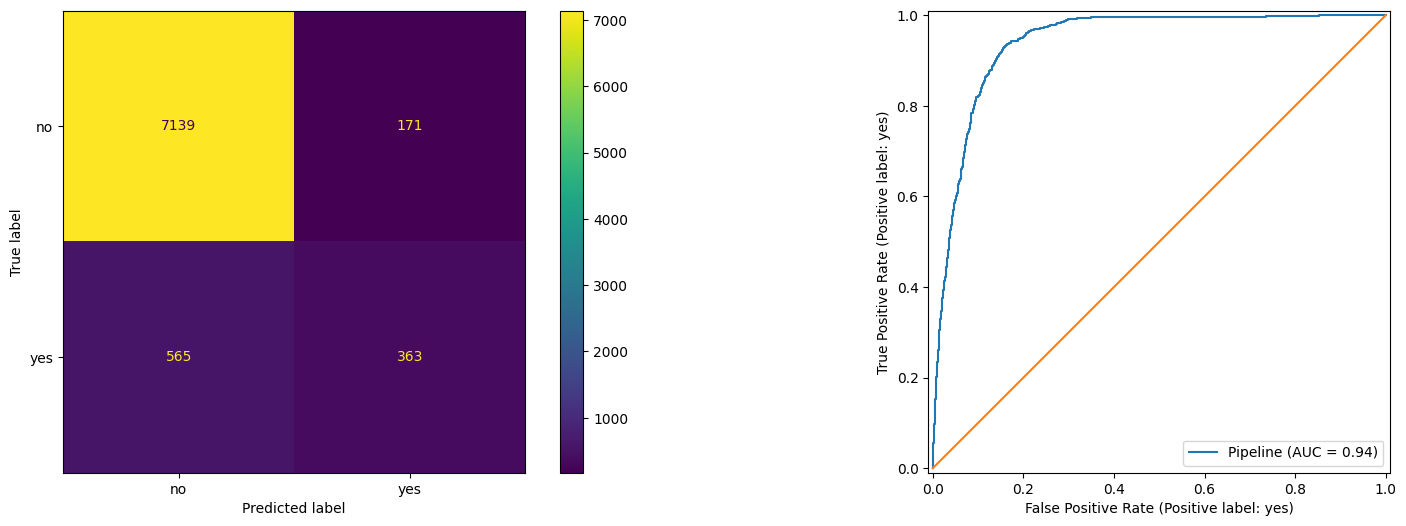

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))


In [ ]:
### Classification Report

print("Training Set:")
print(classification_report(y_train, y_pred_train, target_names=['No', 'Yes']))

Training Set:
              precision    recall  f1-score   support

          No       0.93      0.97      0.95     29238
         Yes       0.66      0.38      0.48      3712

    accuracy                           0.91     32950
   macro avg       0.79      0.68      0.72     32950
weighted avg       0.90      0.91      0.90     32950



In [ ]:
print("\nTest Set:")
print(classification_report(y_test, y_pred_test, target_names=['No', 'Yes']))


Test Set:
              precision    recall  f1-score   support

          No       0.93      0.98      0.95      7310
         Yes       0.68      0.39      0.50       928

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
print("Training Set:")
print(confusion_matrix(y_train, y_pred_train))

print("\nTest Set:")
print(confusion_matrix(y_test, y_pred_test))

Training Set:
[[28497   741]
 [ 2291  1421]]

Test Set:
[[7139  171]
 [ 565  363]]


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
# Create the preprocessing pipeline (without feature selection for fair comparison)
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), selector),
    remainder=StandardScaler()
)

# Define all models with default settings
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Results storage
results = []

for model_name, model in models.items():
    # Create pipeline for this model
    if model_name == 'SVM':
        # SVM needs scaled features, so use transformer
        pipeline = Pipeline([
            ('transformer', transformer),
            ('classifier', model)
        ])
    else:
        # Other models can handle mixed data types
        pipeline = Pipeline([
            ('transformer', transformer),
            ('classifier', model)
        ])

    # Measure training time
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Make predictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Store results
    results.append({
        'Model': model_name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': round(train_accuracy, 4),
        'Test Accuracy': round(test_accuracy, 4)
    })


In [49]:
# Create comparison DataFrame
comparison_df = pd.DataFrame(results)

# Display the table in the requested format
print(f"\n{'='*80}")
print("\t\t\t\t\t\tMODEL COMPARISON RESULTS")
print(f"{'='*80}")

# Create the table exactly as requested
print("| Model \t\t    | Train Time | Train Accuracy | Test Accuracy |")
print("| ----- \t\t    | ---------- | -------------  | -----------   |")

for _, row in comparison_df.iterrows():
    print(f"| {row['Model']:<25} | {row['Train Time']:<11} | {row['Train Accuracy']:<14} | {row['Test Accuracy']:<12} |")

print(f"\n{'='*80}")


						MODEL COMPARISON RESULTS
| Model 		    | Train Time | Train Accuracy | Test Accuracy |
| ----- 		    | ---------- | -------------  | -----------   |
| Logistic Regression       | 9.2386      | 0.8514         | 0.8534       |
| KNN                       | 0.1172      | 0.9293         | 0.8974       |
| Decision Tree             | 0.3187      | 0.9998         | 0.8946       |
| SVM                       | 15.5623     | 0.9168         | 0.9119       |



In [50]:
print(f"\n{'='*80}")

# Also display as a proper DataFrame
print("\nDataFrame Format:")
print(comparison_df.to_string(index=False))

# Additional analysis
print(f"\n{'='*80}")
print("PERFORMANCE ANALYSIS")
print(f"{'='*80}")

# Best performing model
best_test_accuracy = comparison_df['Test Accuracy'].max()
best_model = comparison_df[comparison_df['Test Accuracy'] == best_test_accuracy]['Model'].iloc[0]
print(f"Best Test Accuracy: {best_test_accuracy:.4f} ({best_model})")

# Fastest model
fastest_model = comparison_df[comparison_df['Train Time'] == comparison_df['Train Time'].min()]['Model'].iloc[0]
fastest_time = comparison_df['Train Time'].min()
print(f"Fastest Training: {fastest_time:.4f} seconds ({fastest_model})")

# Overfitting analysis
comparison_df['Overfitting'] = comparison_df['Train Accuracy'] - comparison_df['Test Accuracy']
print(f"\nOverfitting Analysis (Train - Test Accuracy):")
for _, row in comparison_df.iterrows():
    print(f"  {row['Model']}: {row['Overfitting']:.4f}")

print(f"\n{'='*80}")
print("COMPARISON COMPLETE!")
print(f"{'='*80}")



DataFrame Format:
              Model  Train Time  Train Accuracy  Test Accuracy
Logistic Regression      9.2386          0.8514         0.8534
                KNN      0.1172          0.9293         0.8974
      Decision Tree      0.3187          0.9998         0.8946
                SVM     15.5623          0.9168         0.9119

PERFORMANCE ANALYSIS
Best Test Accuracy: 0.9119 (SVM)
Fastest Training: 0.1172 seconds (KNN)

Overfitting Analysis (Train - Test Accuracy):
  Logistic Regression: -0.0020
  KNN: 0.0319
  Decision Tree: 0.1052
  SVM: 0.0049

COMPARISON COMPLETE!


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [52]:
# Load and prepare data
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df['y'] = (df['y'] == 'yes').astype(int)

X = df.drop(columns='y')
y = df['y']

print("="*80)
print("FEATURE ENGINEERING AND EXPLORATION")
print("="*80)

# 1. FEATURE OVERVIEW
print("1. FEATURE OVERVIEW")
print("-" * 40)
print(f"Total features: {X.shape[1]}")
print(f"Total samples: {X.shape[0]}")

print("\nFeature types:")
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical features ({len(categorical_features)}): {list(categorical_features)}")
print(f"Numeric features ({len(numeric_features)}): {list(numeric_features)}")

# 2. FEATURE CORRELATION ANALYSIS (NUMERIC ONLY)
print(f"\n2. FEATURE CORRELATION WITH TARGET (NUMERIC FEATURES)")
print("-" * 60)

correlations = []
for col in numeric_features:
    corr = X[col].corr(y)
    correlations.append((col, corr))

# Sort by absolute correlation
correlations.sort(key=lambda x: abs(x[1]), reverse=True)

print("Numeric features ranked by absolute correlation with target:")
for i, (feature, corr) in enumerate(correlations):
    strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.1 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"  {i+1:2d}. {feature:<20}: {corr:>7.4f} ({strength} {direction})")

# 3. CATEGORICAL FEATURE ANALYSIS
print(f"\n4. CATEGORICAL FEATURE ANALYSIS")
print("-" * 40)

for col in categorical_features:
    print(f"\n{col}:")
    value_counts = X[col].value_counts()
    total = len(X)

    print(f"  Unique values: {len(value_counts)}")
    print(f"  Most common: {value_counts.index[0]} ({value_counts.iloc[0]/total*100:.1f}%)")
    print(f"  Least common: {value_counts.index[-1]} ({value_counts.iloc[-1]/total*100:.1f}%)")

    # Check if any category has very low frequency
    low_freq_threshold = 0.01  # 1%
    low_freq_categories = value_counts[value_counts/total < low_freq_threshold]
    if len(low_freq_categories) > 0:
        print(f"  Low frequency categories (<1%): {len(low_freq_categories)}")

# 4. FEATURE IMPORTANCE FROM LOGISTIC REGRESSION
print(f"\n5. FEATURE IMPORTANCE FROM LOGISTIC REGRESSION")
print("-" * 55)

# Prepare data for logistic regression
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Create transformer
categorical_selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), categorical_selector),
    remainder=StandardScaler()
)

# Transform data
X_transformed = transformer.fit_transform(X)

# Get feature names after transformation
categorical_features_transformed = categorical_selector(X)
encoder = transformer.named_transformers_['onehotencoder']
feature_names = encoder.get_feature_names_out(categorical_features_transformed)
numeric_features_transformed = [col for col in X.columns if col not in categorical_features_transformed]
all_feature_names = list(feature_names) + numeric_features_transformed

# Fit logistic regression
lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr.fit(X_transformed, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': lr.coef_[0]
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

print("Top 15 most important features:")
for i, (_, row) in enumerate(feature_importance.head(15).iterrows()):
    importance = "High" if abs(row['Coefficient']) > 0.5 else "Medium" if abs(row['Coefficient']) > 0.2 else "Low"
    print(f"  {i+1:2d}. {row['Feature']:<30}: {row['Coefficient']:>8.4f} ({importance})")


# 5. FEATURE RECOMMENDATIONS
print(f"\n6. FEATURE RECOMMENDATIONS")
print("-" * 35)

print("Based on the analysis, here are the recommendations:")

# High correlation features
high_corr_features = [f for f, c in correlations if abs(c) > 0.2]
if high_corr_features:
    print(f"\nKEEP these numeric features (high correlation with target):")
    for feature in high_corr_features:
        print(f" {feature}")

# Low correlation features
low_corr_features = [f for f, c in correlations if abs(c) < 0.05]
if low_corr_features:
    print(f"\nCONSIDER REMOVING these numeric features (low correlation):")
    for feature in low_corr_features:
        print(f" {feature}")

# Categorical features with many unique values
many_unique_cat = [col for col in categorical_features if X[col].nunique() > 10]
if many_unique_cat:
    print(f"\nMONITOR these categorical features (many unique values):")
    for feature in many_unique_cat:
        print(f"{feature} ({X[feature].nunique()} unique values)")

print("FEATURE ENGINEERING ANALYSIS COMPLETE!")
print(f"{'='*80}")

FEATURE ENGINEERING AND EXPLORATION
1. FEATURE OVERVIEW
----------------------------------------
Total features: 20
Total samples: 41188

Feature types:
Categorical features (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numeric features (10): ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

2. FEATURE CORRELATION WITH TARGET (NUMERIC FEATURES)
------------------------------------------------------------
Numeric features ranked by absolute correlation with target:
   1. duration            :  0.4053 (Strong Positive)
   2. nr.employed         : -0.3547 (Strong Negative)
   3. pdays               : -0.3249 (Strong Negative)
   4. euribor3m           : -0.3078 (Strong Negative)
   5. emp.var.rate        : -0.2983 (Moderate Negative)
   6. previous            :  0.2302 (Moderate Positive)
   7. cons.price.idx      : -0.1362 (Moderate Negat

#### There is NO gender feature in this bank marketing dataset
Banking regulations often prohibit gender-based discrimination
Privacy concerns in financial data. We should focus on demographic age, job and education.

In [53]:
# 2. TUNED MODELS (GRID SEARCH)
print(f"\n2. TRAINING TUNED MODELS (GRID SEARCH)")
print("-" * 50)



2. TRAINING TUNED MODELS (GRID SEARCH)
--------------------------------------------------


In [54]:
# Verify target conversion
print("Target variable values:", np.unique(y))
print("Target variable type:", y.dtype)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train unique values: {np.unique(y_train)}")
print(f"y_test unique values: {np.unique(y_test)}")

# Create preprocessing pipeline
categorical_selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), categorical_selector),
    remainder=StandardScaler()
)

print("="*80)
print("BASE MODELS vs TUNED MODELS COMPARISON")
print("="*80)

# 1. BASE MODELS (DEFAULT SETTINGS)
print("\n1. TRAINING BASE MODELS (DEFAULT SETTINGS)")
print("-" * 50)

# Define base models with default settings
base_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Store base model results
base_results = []

for model_name, model in base_models.items():
    print(f"\nTraining {model_name} (base)...")

    # Create pipeline for base model
    base_pipeline = Pipeline([
        ('transformer', transformer),
        ('classifier', model)
    ])

    # Measure training time
    start_time = time.time()
    base_pipeline.fit(X_train, y_train)
    base_train_time = time.time() - start_time

    # Make predictions
    y_pred_train = base_pipeline.predict(X_train)
    y_pred_test = base_pipeline.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Store base results
    base_results.append({
        'Model': f"{model_name} (Base)",
        'Train Time': round(base_train_time, 4),
        'Train Accuracy': round(train_accuracy, 4),
        'Test Accuracy': round(test_accuracy, 4)
    })

    print(f"  Train Time: {base_train_time:.4f} seconds")
    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")

Target variable values: [0 1]
Target variable type: int64
Data shapes:
X_train: (32950, 20), X_test: (8238, 20)
y_train unique values: [0 1]
y_test unique values: [0 1]
BASE MODELS vs TUNED MODELS COMPARISON

1. TRAINING BASE MODELS (DEFAULT SETTINGS)
--------------------------------------------------

Training Logistic Regression (base)...
  Train Time: 9.5166 seconds
  Train Accuracy: 0.8589
  Test Accuracy: 0.8653

Training KNN (base)...
  Train Time: 0.1039 seconds
  Train Accuracy: 0.9298
  Test Accuracy: 0.9035

Training Decision Tree (base)...
  Train Time: 0.3421 seconds
  Train Accuracy: 1.0000
  Test Accuracy: 0.8941

Training SVM (base)...
  Train Time: 14.2642 seconds
  Train Accuracy: 0.9218
  Test Accuracy: 0.9149


In [58]:
# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'classifier__max_depth': [3, 5, 7, 10, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__criterion': ['gini', 'entropy']
    },
    'SVM': {
      'classifier__C': [1, 10],           # Only 2 values
      'classifier__kernel': ['linear'],   # Only linear
    }
}

In [59]:
tuned_results = []
for model_name, model in models.items():
    print(f"\nTuning {model_name}...")

    # Create pipeline for tuned model
    tuned_pipeline = Pipeline([
        ('transformer', transformer),
        ('classifier', model)
    ])

    # Grid search
    grid_search = GridSearchCV(
        tuned_pipeline,
        param_grids[model_name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    # Measure total time (tuning + training)
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    total_time = time.time() - start_time

    # Get best model
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Store tuned results
    tuned_results.append({
        'Model': f"{model_name} (Tuned)",
        'Train Time': round(total_time, 4),
        'Train Accuracy': round(train_accuracy, 4),
        'Test Accuracy': round(test_accuracy, 4),
        'Best Parameters': str(grid_search.best_params_)
    })

    print(f"  Total Time: {total_time:.4f} seconds")
    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Best Parameters: {grid_search.best_params_}")

# 3. COMPREHENSIVE COMPARISON TABLE
print(f"\n{'='*100}")
print("COMPREHENSIVE COMPARISON: BASE vs TUNED MODELS")
print(f"{'='*100}")

# Combine all results
all_results = base_results + tuned_results
comparison_df = pd.DataFrame(all_results)

# Display the comparison table exactly like Problem 10
print("| Model | Train Time | Train Accuracy | Test Accuracy |")
print("| ----- | ---------- | -------------  | -----------   |")

for _, row in comparison_df.iterrows():
    print(f"| {row['Model']:<20} | {row['Train Time']:<11} | {row['Train Accuracy']:<14} | {row['Test Accuracy']:<12} |")

print(f"\n{'='*100}")



Tuning Logistic Regression...
  Total Time: 107.5438 seconds
  Train Accuracy: 0.8592
  Test Accuracy: 0.8654
  Best Parameters: {'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}

Tuning KNN...
  Total Time: 135.2731 seconds
  Train Accuracy: 1.0000
  Test Accuracy: 0.9033
  Best Parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}

Tuning Decision Tree...
  Total Time: 29.1346 seconds
  Train Accuracy: 0.9073
  Test Accuracy: 0.9130
  Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Tuning SVM...
  Total Time: 378.9172 seconds
  Train Accuracy: 0.9031
  Test Accuracy: 0.9060
  Best Parameters: {'classifier__C': 10, 'classifier__kernel': 'linear'}

COMPREHENSIVE COMPARISON: BASE vs TUNED MODELS
| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | --

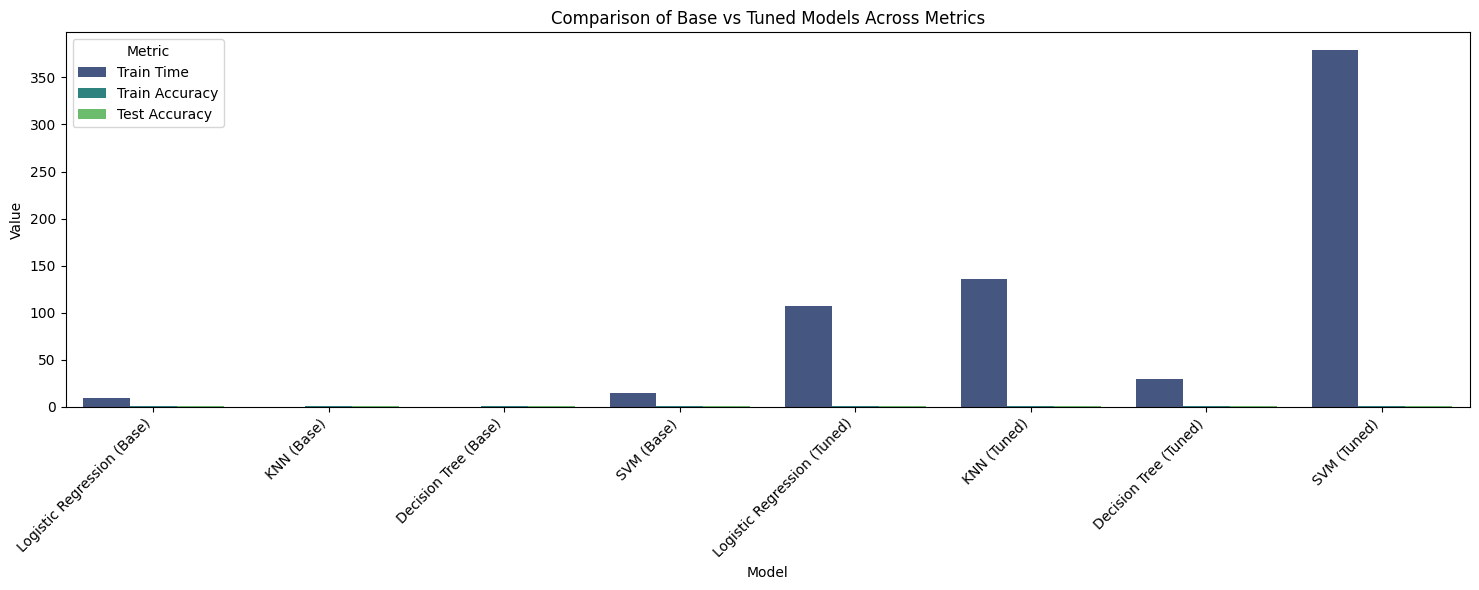

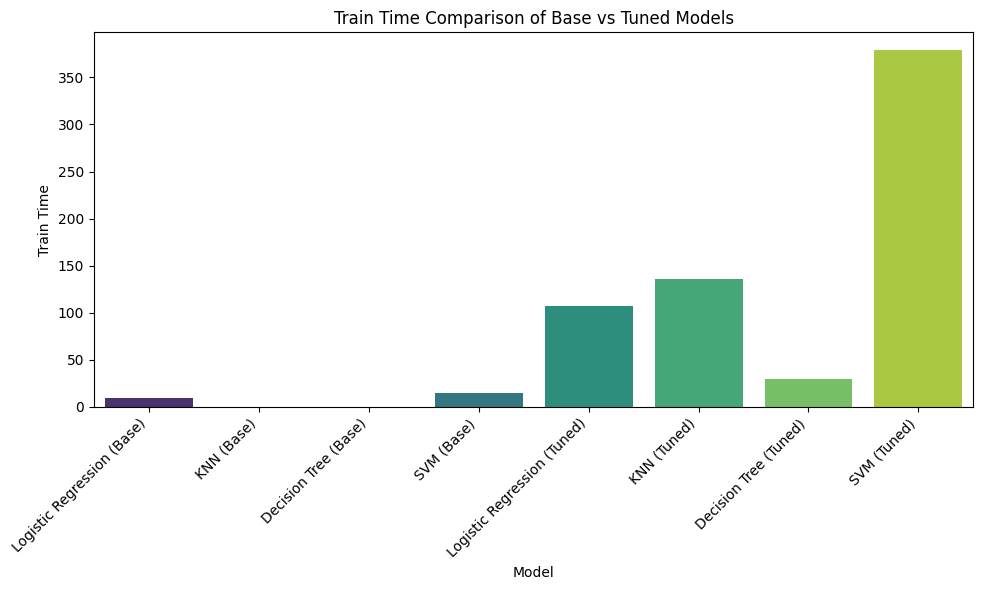

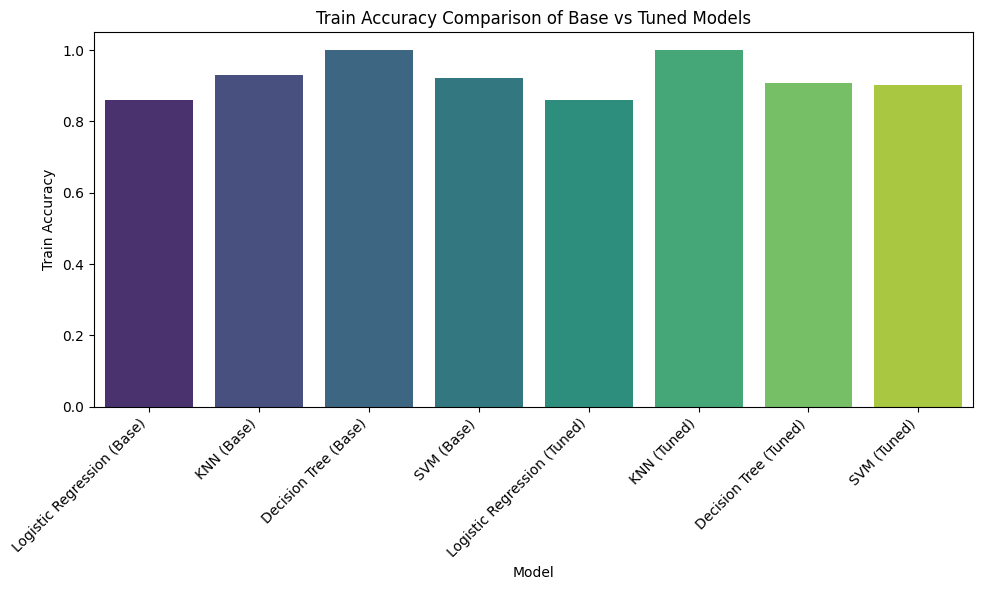

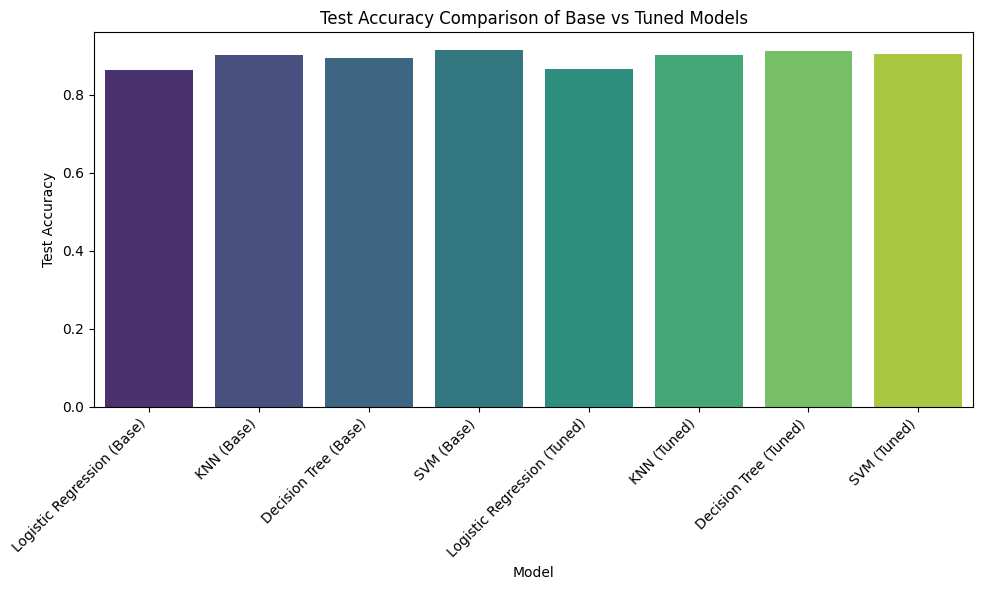

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine base and tuned results
all_results = base_results + tuned_results
comparison_df = pd.DataFrame(all_results)

# Melt the DataFrame for easier plotting
melted_df = comparison_df.melt(
    id_vars='Model',
    value_vars=['Train Time', 'Train Accuracy', 'Test Accuracy'],
    var_name='Metric',
    value_name='Value'
)

# Create plots
plt.figure(figsize=(15, 6))
sns.barplot(data=melted_df, x='Model', y='Value', hue='Metric', palette='viridis')
plt.title('Comparison of Base vs Tuned Models Across Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Separate plots for each metric for better clarity
metrics_to_plot = ['Train Time', 'Train Accuracy', 'Test Accuracy']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=comparison_df, x='Model', y=metric, palette='viridis')
    plt.title(f'{metric} Comparison of Base vs Tuned Models')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### Summary of Model Comparison:

**Overall Performance**: The SVM model (both base and tuned) generally achieved the highest test accuracy among all models.

**Impact of Tuning**:
For Logistic Regression, tuning resulted in a slight improvement in test accuracy but significantly increased training time.

For KNN, tuning led to a higher training accuracy but a very slight decrease in test accuracy, with a substantial increase in training time. This suggests potential overfitting after tuning.

For Decision Tree, tuning improved test accuracy and reduced training accuracy, indicating that tuning helped to reduce overfitting observed in the base Decision Tree model. The training time also increased with tuning.


For SVM, tuning resulted in a slight decrease in test accuracy and a significant increase in training time. The base SVM model performed slightly better in terms of test accuracy and was much faster to train.


Training Time: KNN (Base) was the fastest model to train, while the tuned SVM model was the slowest.

Tuning generally increased the training time for all models, with the most significant increase seen in SVM and KNN.


